## Importing necesary modules

In [85]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [27]:
df=pd.read_csv(r"D:\Data science\Final Guvi Project\cars_class.csv")

In [28]:
df.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [30]:
df.isnull().sum()

ID              0
Comp            0
Circ            0
D.Circ          0
Rad.Ra          0
Pr.Axis.Ra      0
Max.L.Ra        0
Scat.Ra         0
Elong           0
Pr.Axis.Rect    0
Max.L.Rect      0
Sc.Var.Maxis    0
Sc.Var.maxis    0
Ra.Gyr          0
Skew.Maxis      0
Skew.maxis      0
Kurt.maxis      0
Kurt.Maxis      0
Holl.Ra         0
Class           0
dtype: int64

In [31]:
df.columns

Index(['ID', 'Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra',
       'Scat.Ra', 'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis',
       'Sc.Var.maxis', 'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis',
       'Kurt.Maxis', 'Holl.Ra', 'Class'],
      dtype='object')

In [32]:
cols=['ID', 'Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra',
       'Scat.Ra', 'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis',
       'Sc.Var.maxis', 'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis',
       'Kurt.Maxis', 'Holl.Ra', 'Class']

### Balancing the Target Class

Percentage of zero value in target variable:  0.26286509040333794
Percentage of one value in target variable:  0.25034770514603616
Percentage of two value in target variable:  0.24061196105702365
Percentage of three value in target variable:  0.24617524339360222


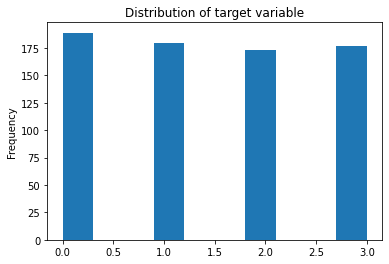

In [34]:
print("Percentage of zero value in target variable: ", ((df['Class'] == 0).sum() /df.shape[0]))
print("Percentage of one value in target variable: ", ((df['Class'] == 1).sum() /df.shape[0]))
print("Percentage of two value in target variable: ", ((df['Class'] == 2).sum() /df.shape[0]))
print("Percentage of three value in target variable: ", ((df['Class'] == 3).sum() /df.shape[0]))
df['Class'].plot(kind='hist', title='Distribution of target variable');

From the above histogram we could see that the target class variables are almost balanced.

In [35]:
target = df['Class'].to_numpy()
corr_dict = {}
for column in df.iloc[:,2:-1]:
    corr, p_val = pointbiserialr(target,df[column].to_numpy())
    if not math.isnan(corr) and (corr) >0.1 and p_val<0.05:
        corr_dict[column] = [corr]

In [36]:
corr_df = pd.DataFrame(corr_dict)
corr_df.head()

,Max.L.Ra,Elong,Skew.maxis,Holl.Ra
0,0.190215,0.338634,0.142547,0.203227


In [37]:
features = df.columns
print(features)

Index(['ID', 'Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra',
       'Scat.Ra', 'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis',
       'Sc.Var.maxis', 'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis',
       'Kurt.Maxis', 'Holl.Ra', 'Class'],
      dtype='object')


In [38]:
coeff_var = pd.DataFrame()
coeff_var['coefficient of variance'] = df[features].std()/df[features].mean()
coeff_var.head(16)

,coefficient of variance
ID,0.576949
Comp,0.086813
Circ,0.137126
D.Circ,0.190010
Rad.Ra,0.200553
Pr.Axis.Ra,0.133541
Max.L.Ra,0.570019
Scat.Ra,0.195897
Elong,0.189031
Pr.Axis.Rect,0.124735


## Train and test dataset preparation

 The dataset is split into 80%-20% for training and testing respectively.

In [39]:
X=df.drop( columns='Class')

In [40]:
data_X, data_Y = df.drop( columns='Class'), df["Class"]
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, train_size=0.8, random_state=0, shuffle=True, stratify=data_Y)

## Testing networks

To model the target label, three machine learning classification models were chosen (i.e) logistic regression, support vector machine and random forest classifier. Optimal parameters for each model were identified using GridSearch and the model with the best accuracy score is chosen for prediction on the test set.

In [41]:
log_reg = LogisticRegression()
parameters = {
    'penalty': ['l2'],
    'C': np.logspace(-3,3,7),
    'solver': ['newton-cg', 'liblinear'],
    'max_iter': [100]
}

In [42]:
logres_clf = GridSearchCV(log_reg, param_grid = parameters, scoring='accuracy', cv=5, refit=True, verbose=2)
logres_clf.fit(train_X,train_Y)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=0.001, max_iter=200, penalty=l2, sol

D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.9s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.8s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.8s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.8s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=200, penalty=l2, solver=newton-cg; total time=   1.4s
[CV] END ..C=0.1, max_iter=200, penalty=l2, solver=newton-cg; total time=   1.7s
[CV] END ..C=0.1, max_iter=200, penalty=l2, solver=newton-cg; total time=   1.6s
[CV] END ..C=0.1, max_iter=200, penalty=l2, solver=newton-cg; total time=   1.3s
[CV] END ..C=0.1, max_iter=200, penalty=l2, solver=newton-cg; total time=   1.5s
[CV] END ..C=0.1, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=2

D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.7s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.8s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.9s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.0s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.1s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   2.3s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   1.8s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   1.9s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   1.6s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   2.1s
[CV] END ..C=1.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   4.3s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   3.8s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   4.6s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   4.1s


D:\SOFTWARES\New folder (3)\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\SOFTWARES\New folder (3)\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ..C=1.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   4.7s
[CV] END ..C=1.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.7s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.7s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.6s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.8s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END .C=10.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=10.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=10.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=10.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=10.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   1.9s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   1.7s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   2.3s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   2.3s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   2.3s
[CV] END .C=10.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=10.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=10.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=10.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=10.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   4.9s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   4.5s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   5.3s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   5.0s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END .C=10.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   5.2s
[CV] END .C=10.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=10.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=10.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=10.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=10.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.1s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.8s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.0s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.7s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END C=100.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   2.1s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   2.0s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   2.2s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   1.9s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   2.2s
[CV] END C=100.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   5.3s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   5.6s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   5.8s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   8.2s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=100.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   6.1s
[CV] END C=100.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.0s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.2s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.2s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.0s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   1.0s
[CV] END C=1000.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   2.6s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   2.4s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   2.5s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   2.5s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=200, penalty=l2, solver=newton-cg; total time=   2.8s
[CV] END C=1000.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   5.3s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   6.2s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   6.7s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   9.7s


D:\SOFTWARES\New folder (3)\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=1000.0, max_iter=400, penalty=l2, solver=newton-cg; total time=   6.4s
[CV] END C=1000.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': [100, 200, 400], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'liblinear']},
             scoring='accuracy', verbose=2)

In [61]:
print("Tuned Hyperparameters :", logres_clf.best_params_)
print("Accuracy :", logres_clf.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.808695652173913


In [62]:
logres_pred = logres_clf.best_estimator_.predict(test_X)

In [63]:
f1_score(y_true=test_Y, y_pred=logres_pred,average='weighted')

0.8051661756212167

### Support Vector Machine (SVM)

In [57]:
svc = SVC()
parameters = {
    'C': [0.1,1, 10, 100],
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [58]:
svc_clf = GridSearchCV(svc, param_grid = parameters, scoring='accuracy', cv=5, refit=True,verbose=2)
svc_clf.fit(train_X,train_Y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 1.9min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 4.5min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 1.2min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 1.2min
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time= 1.3min
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [65]:
print("Tuned Hyperparameters :", svc_clf.best_params_)
print("Accuracy :", svc_clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Accuracy : 0.7913043478260869


In [66]:
svc_pred = svc_clf.best_estimator_.predict(test_X)

In [67]:
f1_score(y_true=test_Y, y_pred=svc_pred ,average='weighted')

0.8096273250461206

## RandomForestClassifier

In [68]:
rf =  RandomForestClassifier()
parameters = {
    'n_estimators': [100, 500, 1000, 2000],
    'max_depth': [10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [69]:
rf_clf = GridSearchCV(rf, param_grid = parameters, scoring='accuracy', cv=5, refit=True, verbose=2)
rf_clf.fit(train_X,train_Y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, min_s

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 50, 100],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000]},
             scoring='accuracy', verbose=2)

In [73]:
print("Tuned Hyperparameters :", rf_clf.best_params_)
print("Accuracy :", rf_clf.best_score_)

Tuned Hyperparameters : {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy : 0.7565217391304347


In [74]:
rf_pred = rf_clf.best_estimator_.predict(test_X)

In [76]:
f1_score(y_true=test_Y, y_pred=rf_pred,average='weighted')

0.7177284621578099

### Accuracy

In [77]:
models = ['Logistic Regression', 'Support Vector Machine', 'Random Forest']

In [78]:
acc_dict = {'Logistic Regression': [accuracy_score(test_Y,logres_pred)], 'Support Vector Machine': [accuracy_score(test_Y,svc_pred)], 'Random Forest': [accuracy_score(test_Y,rf_pred)]}
acc_df = pd.DataFrame(acc_dict)
acc_df.head()

,Logistic Regression,Support Vector Machine,Random Forest
0,0.805556,0.805556,0.722222


## f1 Score

In [83]:
f1_dict = {'Logistic Regression': [f1_score(y_true=test_Y, y_pred=logres_pred,average='weighted')], 'Support Vector Machine': [f1_score(y_true=test_Y, y_pred=svc_pred ,average='weighted')], 'Random Forest': [f1_score(y_true=test_Y, y_pred=rf_pred,average='weighted')]}
f1_df = pd.DataFrame(f1_dict)
f1_df.head()

,Logistic Regression,Support Vector Machine,Random Forest
0,0.805166,0.809627,0.717728


Among the three networks, it can be observed that the support vector machine performs the best, as seen by the accuracy score after 5-fold cross validation. Therefore, support vector machine is the model of choice.

### Confusion Matrix

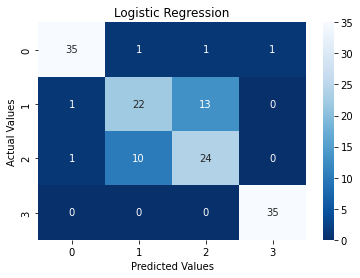

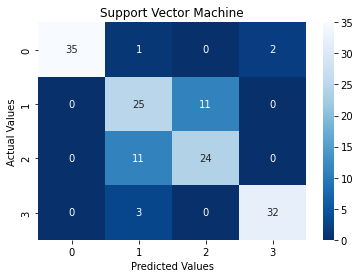

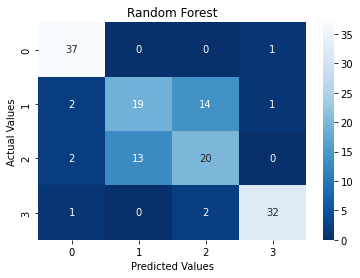

In [61]:
cfm_list = [confusion_matrix(test_Y, logres_pred), confusion_matrix(test_Y, svc_pred), confusion_matrix(test_Y,rf_pred)]
fig2 = plt.Figure(figsize=(30,30))
for i in range(len(models)):
    sub = fig2.add_subplot(3,1,1)
    plt.figure()
    plt.title(models[i])
    cm_plot = sns.heatmap(cfm_list[i], annot=True, cmap= "Blues_r")
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")